<a href="https://colab.research.google.com/github/Nouran-Khallaf/Arabic-Readability-Corpus/blob/main/Extra-NoteBooks/Parliament_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Parliment Dataset

https://explore.data.parliament.uk/?endpoint=answeredquestions#download-list

In [ ]:
!pip install mglearn
!pip install gdown
!pip install wordcloud
!pip install plotly
!pip install spacy
!pip install spacy-langdetect
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993414 sha256=8f4fee34048593fa71ba8bc1145cb3b6b2157cb332cb59512956cfccd3402313
  Stored in directory: /root/.cache/pip/wheels/97/f1/e4/8b73f7a0421b132755956892d29b1e764d3e0857a6e92e32fe
Successfully built langdetect


In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1e8wVpN4hq2whC17XSGB0o2yXEaIZJSR3'
output = 'Multilingual-Dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1e8wVpN4hq2whC17XSGB0o2yXEaIZJSR3
To: /content/Multilingual-Dataset.zip
100%|██████████| 229k/229k [00:00<00:00, 77.4MB/s]


'Multilingual-Dataset.zip'

In [ ]:
import zipfile
import os

if zipfile.is_zipfile(output):
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print("Files extracted:")
    print(os.listdir('/content/'))
else:
    print("Downloaded file is not a zip file.")

Files extracted:
['.config', 'licence.html', 'Greek', 'combined_files.csv', 'Hebrew', 'French', 'Multilingual-Dataset.zip', 'Arabic', 'Czech', 'Hindi', 'English', 'sample_data']


In [ ]:
import pandas as pd

# Load the dataset with additional parameters to handle potential formatting issues
try:
    df = pd.read_csv('/content/answeredquestions.csv', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print("ParserError:", e)


In [ ]:
df.head()

,uri,answering body,answer > is ministerial correction,answer > date of answer,answer > answer text,answer > answering member constituency,answer > answering member printed,answer > grouped question UIN,answer > question first answered,answer > question first ministerially corrected,...,date,hansard heading,house id,legislature > pref label,question text,registered interest,tabling member > label,tabling member constituency,tabling member printed,uin
0,http://data.parliament.uk/resources/1717682,Department of Health and Social Care,False,2024-05-20,"<p>In August 2023, the Department published My...",Pendle,Andrew Stephenson,NaN,2024-05-20T08:53:23.257Z,NaN,...,2024-05-13,Chronic Fatigue Syndrome: Health Services,1,House of Commons,To ask the Secretary of State for Health and S...,False,Biography information for Daisy Cooper,St Albans,Daisy Cooper,25988
1,http://data.parliament.uk/resources/1717683,Department for Education,False,2024-05-21,<p>The ‘Children looked after in England inclu...,Wantage,David Johnston,NaN,2024-05-21T11:38:14.713Z,NaN,...,2024-05-13,Children in Care,1,House of Commons,"To ask the Secretary of State for Education, h...",False,Biography information for Daisy Cooper,St Albans,Daisy Cooper,25989
2,http://data.parliament.uk/resources/1717684,Treasury,False,2024-05-20,<p>The most recent year for which we hold comp...,Mid Worcestershire,Nigel Huddleston,25982 ; 25983,2024-05-20T15:33:22.577Z,NaN,...,2024-05-13,VAT Exemptions,1,House of Commons,"To ask the Chancellor of the Exchequer, how ma...",False,Biography information for Chris Loder,West Dorset,Chris Loder,25981
3,http://data.parliament.uk/resources/1717685,Treasury,False,2024-05-20,<p>The most recent year for which we hold comp...,Mid Worcestershire,Nigel Huddleston,25981 ; 25983,2024-05-20T15:33:22.637Z,NaN,...,2024-05-13,VAT,1,House of Commons,"To ask the Chancellor of the Exchequer, how ma...",False,Biography information for Chris Loder,West Dorset,Chris Loder,25982
4,http://data.parliament.uk/resources/1717686,Treasury,False,2024-05-20,<p>The most recent year for which we hold comp...,Mid Worcestershire,Nigel Huddleston,25981 ; 25982,2024-05-20T15:33:22.687Z,NaN,...,2024-05-13,VAT,1,House of Commons,"To ask the Chancellor of the Exchequer, how ma...",False,Biography information for Chris Loder,West Dorset,Chris Loder,25983


In [ ]:
import os
import pandas as pd

def combine_files_to_dataframe(directory_path):
    # Initialize an empty list to store the data
    data = []

    # Loop through all files in the directory
    for file_name in os.listdir(directory_path):
        # Construct full file path
        file_path = os.path.join(directory_path, file_name)

        # Ensure it's a file
        if os.path.isfile(file_path):
            # Read the content of each file
            with open(file_path, 'r') as file:
                content = file.read()
                # Append the file name and content to the data list
                data.append({'Title': file_name, 'Content': content.strip()})

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    return df

# Specify the directory containing the files
directory_path = '/content/English'

# Combine the files into a DataFrame
df = combine_files_to_dataframe(directory_path)

# Display the DataFrame
print(df)

# save the DataFrame to a CSV file
df.to_csv('combined_files.csv', index=False)


         Title                                            Content
0   M008.B.250  On June 1, 2009 Air France flight 447 carrying...
1   M002.B.250  In March 2007 a British frigate with 15 Navy p...
2   M004.B.250  On early December 2007 began the proceedings o...
3   M007.B.250  In January 2005, Corporal Graner was found gui...
4   M002.C.250  Fifteen British Royal Navy personnel was been ...
5   M007.C.250  Charles Graner was guilty of abusing prisoners...
6   M006.A.250  The strong 7.0 magnitude earthquake that hit H...
7   M003.A.250  Alberto Contador of Spain won the 2007 Tour de...
8   M007.A.250  Pictures of extensive detainee abuse in Abu Gh...
9   M008.C.250  An Air France jet with 216 passengers and 12 c...
10  M006.C.250  Haiti earthquake left material destruction, de...
11  M009.C.250  On April 5, 2008, after the completion of 2008...
12  M001.B.250  After the London bombings in July 2005, the Br...
13  M004.C.250  In Bali took place the "United Nations Climate...
14  M001.A

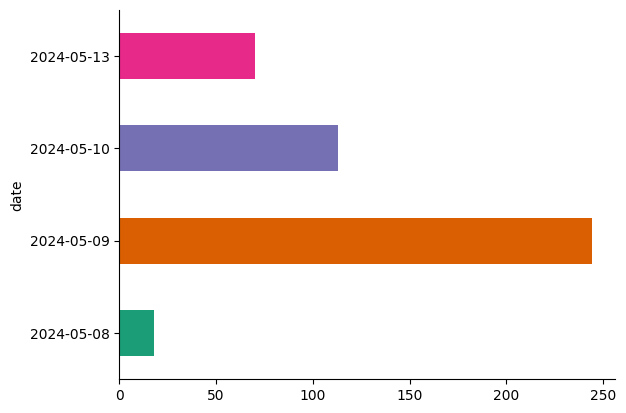

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(445, 35)

In [ ]:
df.isnull().sum() #no missing values

uri                                                                   0
answering body                                                        0
answer > is ministerial correction                                    0
answer > date of answer                                               0
answer > answer text                                                  0
answer > answering member constituency                               64
answer > answering member printed                                     0
answer > grouped question UIN                                       353
answer > question first answered                                      0
answer > question first ministerially corrected                     445
answer > uri                                                          0
answer > answering member > label                                     0
answer > uri.1                                                        0
answer > attachment > file name                                 

In [ ]:
df_subset = df.loc[:,['question text', 'answer > answer text', 'answer > answering member printed']]

In [ ]:
df_subset

,question text,answer > answer text,answer > answering member printed
0,To ask the Secretary of State for Health and S...,"<p>In August 2023, the Department published My...",Andrew Stephenson
1,"To ask the Secretary of State for Education, h...",<p>The ‘Children looked after in England inclu...,David Johnston
2,"To ask the Chancellor of the Exchequer, how ma...",<p>The most recent year for which we hold comp...,Nigel Huddleston
3,"To ask the Chancellor of the Exchequer, how ma...",<p>The most recent year for which we hold comp...,Nigel Huddleston
4,"To ask the Chancellor of the Exchequer, how ma...",<p>The most recent year for which we hold comp...,Nigel Huddleston
...,...,...,...
440,"To ask the Secretary of State for Defence, whi...",<p>The Ministry of Defence (MOD) has commissio...,Dr Andrew Murrison
441,"To ask the Secretary of State for Defence, wit...",<p>The investigation into the network compromi...,Dr Andrew Murrison
442,"To ask the Secretary of State for Defence, whe...",<p>The investigation into the network compromi...,Dr Andrew Murrison
443,"To ask the Secretary of State for Defence, whe...",<p>At present there is no evidence that any pe...,Dr Andrew Murrison


In [ ]:
df_subset = df_subset.rename(columns={'question text': 'Question', 'answer > answer text': 'Answer',
                           'answer > answering member printed': 'Person'})


<Axes: xlabel='Person'>

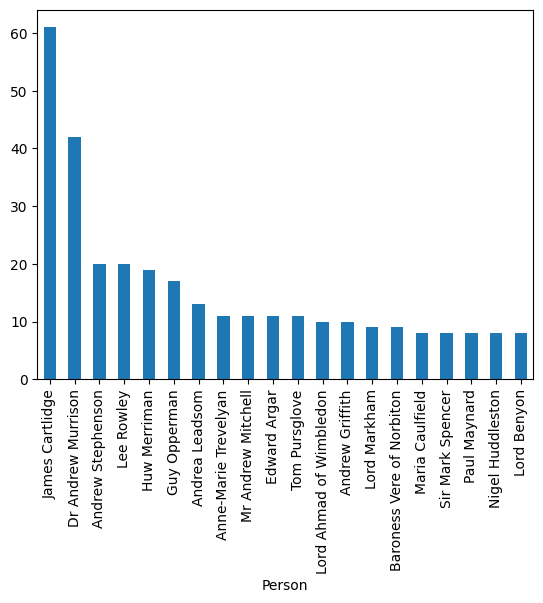

In [ ]:
df_subset['Person'].value_counts().nlargest(20).plot(kind = 'bar')

In [ ]:
import plotly.express as px

# Use Plotly for visualisation
fig = px.bar(df_subset.groupby('Person').size().sort_values(ascending=False).reset_index(),
             x='Person', y=0,
             labels={'0': 'Count'},
             color='Person',  # Color bars
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use a color palette

fig.update_layout(
    title='Distribution of Answers Sources',
    xaxis_title='Person',
    yaxis_title='Count',
    showlegend=False
)

fig.show()


In [ ]:
import plotly.graph_objects as go
# Create a count of questions and answers per person
person_count = df_subset.groupby('Person').size().reset_index(name='Count')

# Sort the counts in descending order 'ascending=False'
person_count = person_count.sort_values(by='Count', ascending=False)

# Display the count table using Plotly Graph Objects
fig_count_table = go.Figure(data=[go.Table(
    header=dict(values=list(person_count.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[person_count.Person, person_count.Count],
               fill_color='lavender',
               align='left'))
])

fig_count_table.update_layout(
    title='Count of Questions and Answers per Person'
)

fig_count_table.show()

How to save these tables?

In [ ]:
!pip install -U kaleido

In [ ]:
fig_count_table.write_image("count_of_questions_answers.png")
fig_count_table.write_html("count_of_questions_answers.html")

Data prep

### 1.2 Preprocess the text data

We will use spaCy to preprocess the text data, including tokenization and stop words removal.

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup


def clean_html(raw_html):
    """Remove HTML tags from a string"""
    soup = BeautifulSoup(raw_html, "html.parser")
    return soup.get_text()

def clean_text(text):
    """Remove unwanted text patterns and clean the text"""
    text = clean_html(text)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers if needed
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Apply preprocessing to the 'Answer' column
df_subset['clean_answer'] = df_subset['Answer'].apply(clean_text)

print("\nFirst few rows of the cleaned dataset:")
print(df_subset[['Answer', 'clean_answer']].head())




First few rows of the cleaned dataset:
                                              Answer  \
0  <p>In August 2023, the Department published My...   
1  <p>The ‘Children looked after in England inclu...   
2  <p>The most recent year for which we hold comp...   
3  <p>The most recent year for which we hold comp...   
4  <p>The most recent year for which we hold comp...   

                                        clean_answer  
0  In August , the Department published My Full R...  
1  The ‘Children looked after in England includin...  
2  The most recent year for which we hold complet...  
3  The most recent year for which we hold complet...  
4  The most recent year for which we hold complet...  


## Step 2: Data Visualization

### 2.1 Word Frequency Visualization

https://www.wordclouds.co.uk/

### Explanation

1. **Color Themes:**
   - `colormap='viridis'` sets a color theme for the word cloud. You can choose from various colormaps provided by Matplotlib (e.g., 'viridis', 'plasma', 'inferno', 'magma').

2. **Custom Shapes:**
   - `mask=mask` uses a custom mask image to shape the word cloud. You need to provide the path to an image file (e.g., a PNG file with a transparent background).

3. **Advanced Styling:**
   - `contour_width` and `contour_color` add contour lines to the word cloud.
   - `random_state=42` ensures reproducibility by setting a random state.
   - `max_words=200` limits the number of words displayed in the word cloud.
   - `stopwords=stopwords` removes common stop words from the word cloud.



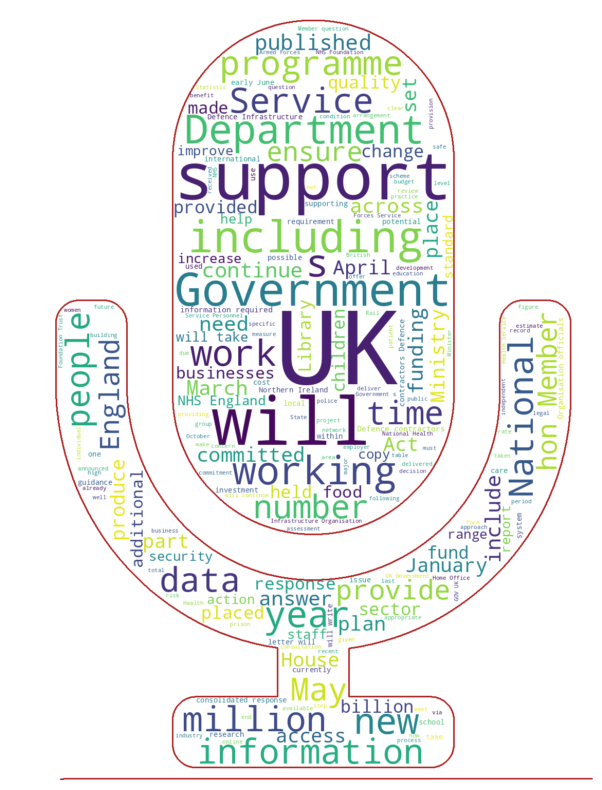

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_word_cloud(texts, mask_path):
    # Combine all texts into one string
    all_words = ' '.join(texts)

    # Load a mask image for custom shape
    mask = np.array(Image.open(mask_path))  # mask image path

    # Define stop words
    stopwords = set(STOPWORDS)

    # Create a WordCloud object with additional customization
    wordcloud = WordCloud(

        background_color='white',
        max_words=200,
        stopwords=stopwords,
        mask=mask,  # Use mask for custom shape
        contour_width=3,
        contour_color='firebrick',
        colormap='viridis',  # Color theme
        width=800,
        height=400,
        random_state=42
    ).generate(all_words)

    # Display the word cloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


visualize_word_cloud(df_subset['clean_answer'], 'Mic.png')


In [ ]:
df_subset

,Question,Answer,Person,clean_text,clean_answer
0,To ask the Secretary of State for Health and S...,"<p>In August 2023, the Department published My...",Andrew Stephenson,< p > August 2023 Department published Reality...,"In August , the Department published My Full R..."
1,"To ask the Secretary of State for Education, h...",<p>The ‘Children looked after in England inclu...,David Johnston,< p > Children looked England including adopti...,The ‘Children looked after in England includin...
2,"To ask the Chancellor of the Exchequer, how ma...",<p>The most recent year for which we hold comp...,Nigel Huddleston,< p > recent year hold complete tax records bu...,The most recent year for which we hold complet...
3,"To ask the Chancellor of the Exchequer, how ma...",<p>The most recent year for which we hold comp...,Nigel Huddleston,< p > recent year hold complete tax records bu...,The most recent year for which we hold complet...
4,"To ask the Chancellor of the Exchequer, how ma...",<p>The most recent year for which we hold comp...,Nigel Huddleston,< p > recent year hold complete tax records bu...,The most recent year for which we hold complet...
...,...,...,...,...,...
440,"To ask the Secretary of State for Defence, whi...",<p>The Ministry of Defence (MOD) has commissio...,Dr Andrew Murrison,< p > Ministry Defence MOD commissioned indepe...,The Ministry of Defence (MOD) has commissioned...
441,"To ask the Secretary of State for Defence, wit...",<p>The investigation into the network compromi...,Dr Andrew Murrison,< p > investigation network compromise ongoing...,The investigation into the network compromise ...
442,"To ask the Secretary of State for Defence, whe...",<p>The investigation into the network compromi...,Dr Andrew Murrison,< p > investigation network compromise ongoing...,The investigation into the network compromise ...
443,"To ask the Secretary of State for Defence, whe...",<p>At present there is no evidence that any pe...,Dr Andrew Murrison,< p > present evidence personnel exchange prog...,At present there is no evidence that any perso...


No charts were generated by quickchart
